<a href="https://colab.research.google.com/github/IshaqKHATTAK/Kaggle-work/blob/main/stockexchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q#2
a. Therefore, briefly discuss the various schemes/methods used to define this input vector in this financial domain.

ans: The input schemes or the input vector in time series analysis paly a vital role in model performance and robust results so The input vector schemes for such problem consist of considering the data from previous time stamp starting from t-1, t-2,.. t-k where t represent the time and k represents the prevous time stamps that you are considering. In our case as we are limited to use only one colum and upto t-4 so out input vector schemes for this problem is to predict output based on t-1 then t-1 and t-2 and then t-1, t-2 and t-3 and so on for t-4.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
df = pd.read_excel('/content/ExchangeUSD (1).xlsx')
df.head()

,YYYY/MM/DD,Wdy,USD/EUR
0,2011-10-13,Thu,1.3730
1,2011-10-14,Fri,1.3860
2,2011-10-17,Mon,1.3768
3,2011-10-18,Tue,1.3718
4,2011-10-19,Wed,1.3774


In [ ]:
df = df['USD/EUR'] #Because we only need this column
df

0      1.3730
1      1.3860
2      1.3768
3      1.3718
4      1.3774
        ...  
495    1.3641
496    1.3583
497    1.3569
498    1.3581
499    1.3512
Name: USD/EUR, Length: 500, dtype: float64

In [ ]:
df.isna().sum()

0

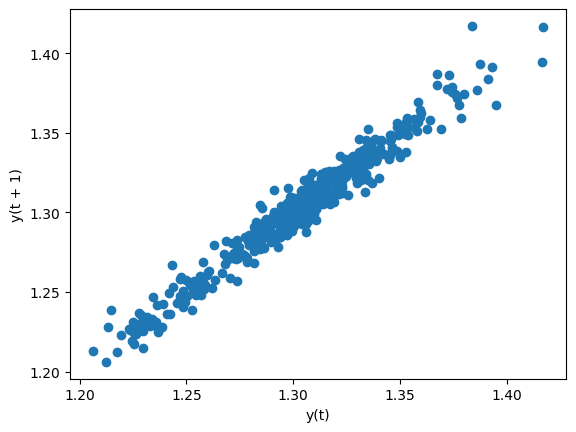

In [ ]:
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

In [ ]:
# Step (b): Construct input/output matrix for MLP training/testing
def create_io_matrix(data, time_delay):
    """
    Create input/output matrix for MLP training/testing.
    Parameters:
        data (DataFrame): DataFrame containing the exchange rate data.
        time_delay (int): Number of time-delayed values to consider.
    Returns:
        X_df (DataFrame): Input matrix for MLP with columns named t-1, t-2, etc.
        y_df (DataFrame): Output matrix for MLP.
    """
    X_df = pd.DataFrame()
    y_df = pd.DataFrame()

    for i in range(len(data) - time_delay):
        # Create column names for input data
        input_columns = [f"t-{j}" for j in range(time_delay, 0, -1)]

        # Extract time-delayed values and append to X_df
        X_df = X_df.append(pd.DataFrame(data.iloc[i:i+time_delay].values.reshape(1, -1), columns=input_columns), ignore_index=True)

        # Extract corresponding output value and append to y_df
        y_df = y_df.append(pd.DataFrame(data.iloc[i+time_delay].values.reshape(1, -1), columns=["t"]), ignore_index=True)

    return X_df, y_df


Question:why do we need to normalise data before using them in an MLP structure?

Answer: Normalizing data before using it in a Multi-Layer Perceptron (MLP) structure is essential for several reasons. Firstly, normalization helps to scale the input features to a similar range, preventing certain features from dominating others solely based on their scale. This is crucial because MLPs are sensitive to the scale of input features, and features with larger scales can disproportionately influence the model's training process. Normalization also aids in speeding up the convergence of the optimization algorithm, such as gradient descent, by ensuring that the gradients are more balanced across features. Additionally, normalization helps to mitigate the issues of vanishing or exploding gradients, which can occur during training when the input features have vastly different scales. By bringing all features to a similar scale, normalization promotes more stable and efficient training of MLPs, ultimately leading to better model performance and generalization to unseen data.

In [ ]:
# Step (c): Normalize the data
from sklearn.preprocessing import MinMaxScaler

def normalize_data(data):
    """
    Normalize the data using Min-Max scaling for each column.

    Parameters:
        data (DataFrame): Data to be normalized.

    Returns:
        normalized_data (DataFrame): Normalized data.
        scalers (dict): Dictionary containing scalers for each column.
    """
    scalers = {}
    normalized_data = data.copy()
    for column in data.columns:
        scaler = MinMaxScaler()
        normalized_column = scaler.fit_transform(data[[column]])
        normalized_data[column] = normalized_column
        scalers[column] = scaler
    return normalized_data, scalers


In [ ]:
# Step (d): Train MLP models and evaluate performance
def train_evaluate_mlp(X_train, y_train, X_test, y_test, hidden_layers=(100,), activation='relu'):
    """
    Train MLP models and evaluate performance.

    Parameters:
        X_train (array): Training input data.
        y_train (array): Training output data.
        X_test (array): Testing input data.
        y_test (array): Testing output data.
        hidden_layers (tuple): Hidden layer configuration.
        activation (str): Activation function.

    Returns:
        mlp (MLPRegressor): Trained MLP model.
        mse (float): Mean squared error.
        mae (float): Mean absolute error.
    """
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layers, activation=activation, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mlp, mse, mae

Qeustion:	Briefly explain the meaning of these four stat (rmse, mae, mape, smape).

Answer:
**Root Mean Squared Error (RMSE)**: RMSE measures the average magnitude of the errors between predicted and actual values. It is calculated by taking the square root of the average of squared differences between predicted and actual values.

**Mean Absolute Error (MAE)**: MAE measures the average absolute difference between predicted and actual values. It is calculated by taking the average of the absolute differences between predicted and actual values.

**Mean Absolute Percentage Error (MAPE)**: MAPE measures the average percentage difference between predicted and actual values relative to the actual values. It is calculated by taking the average of the absolute percentage differences between predicted and actual values. MAPE is useful for understanding the relative accuracy of predictions across different scales of the target variable.

**Symmetric Mean Absolute Percentage Error (sMAPE)**: It measures the average percentage difference between predicted and actual values relative to the average of predicted and actual values. sMAPE is often used in forecasting tasks and provides a symmetric measure of prediction accuracy.

In [ ]:
# Step (e): Define statistical indices
def calculate_statistics(y_true, y_pred):
    """
    Calculate statistical indices for model evaluation.
    Parameters:
        y_true (array): True values.
        y_pred (array): Predicted values.
    Returns:
        rmse (float): Root mean squared error.
        mae (float): Mean absolute error.
        mape (float): Mean absolute percentage error.
        smape (float): Symmetric mean absolute percentage error.
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
    return rmse, mae, mape, smape

In [ ]:
df = pd.read_excel('/content/ExchangeUSD (1).xlsx')
df.head()

,YYYY/MM/DD,Wdy,USD/EUR
0,2011-10-13,Thu,1.3730
1,2011-10-14,Fri,1.3860
2,2011-10-17,Mon,1.3768
3,2011-10-18,Tue,1.3718
4,2011-10-19,Wed,1.3774


In [ ]:
exchange_rate_data = df['USD/EUR']
exchange_rate_data_df = pd.DataFrame(exchange_rate_data, columns=['USD/EUR']) #to convert into dataframe instead of ndarray

In [ ]:

# Step (b): Create input/output matrix
X, y = create_io_matrix(exchange_rate_data_df, 3)

<ipython-input-7-80c49890506e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_df = X_df.append(pd.DataFrame(data.iloc[i:i+time_delay].values.reshape(1, -1), columns=input_columns), ignore_index=True)
<ipython-input-7-80c49890506e>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_df = y_df.append(pd.DataFrame(data.iloc[i+time_delay].values.reshape(1, -1), columns=["t"]), ignore_index=True)
<ipython-input-7-80c49890506e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_df = X_df.append(pd.DataFrame(data.iloc[i:i+time_delay].values.reshape(1, -1), columns=input_columns), ignore_index=True)
<ipython-input-7-80c49890506e>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

In [ ]:
X

,t-3,t-2,t-1
0,1.3730,1.3860,1.3768
1,1.3860,1.3768,1.3718
2,1.3768,1.3718,1.3774
3,1.3718,1.3774,1.3672
4,1.3774,1.3672,1.3872
...,...,...,...
492,1.3534,1.3534,1.3592
493,1.3534,1.3592,1.3641
494,1.3592,1.3641,1.3583
495,1.3641,1.3583,1.3569


In [ ]:
y

,t
0,1.3718
1,1.3774
2,1.3672
3,1.3872
4,1.3932
...,...
492,1.3641
493,1.3583
494,1.3569
495,1.3581


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = X[:400], X[400:], y[:400], y[400:]

In [ ]:
# Step (c): Normalize the data
X_train_normalized, X_scalers = normalize_data(X_train)
y_train_normalized, y_scalers = normalize_data(y_train)

In [ ]:
X_train_normalized

,t-3,t-2,t-1
0,0.790995,0.852607,0.809005
1,0.852607,0.809005,0.785308
2,0.809005,0.785308,0.811848
3,0.785308,0.811848,0.763507
4,0.811848,0.763507,0.858294
...,...,...,...
395,0.423223,0.435545,0.430332
396,0.435545,0.430332,0.377725
397,0.430332,0.377725,0.396682
398,0.377725,0.396682,0.358294


In [ ]:
for col in X_test.columns:
  normalized = X_scalers[col].transform(X_test[[col]])
  X_test[col] = normalized

<ipython-input-19-ae704a515c08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = normalized
<ipython-input-19-ae704a515c08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = normalized
<ipython-input-19-ae704a515c08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [ ]:
X_test

,t-3,t-2,t-1
400,0.358294,0.402370,0.381043
401,0.402370,0.381043,0.416114
402,0.381043,0.416114,0.407109
403,0.416114,0.407109,0.414692
404,0.407109,0.414692,0.383412
...,...,...,...
492,0.698104,0.698104,0.725592
493,0.698104,0.725592,0.748815
494,0.725592,0.748815,0.721327
495,0.748815,0.721327,0.714692


In [ ]:
for col in y_test.columns:
  normalized = y_scalers[col].transform(y_test[[col]])
  y_test[col] = normalized

<ipython-input-21-6d7ba80aba2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[col] = normalized


In [ ]:
y_test

,t
400,0.416114
401,0.407109
402,0.414692
403,0.383412
404,0.418009
...,...
492,0.748815
493,0.721327
494,0.714692
495,0.720379


In [ ]:
# Step (d): Train MLP models and evaluate performance
mlp, mse, mae = train_evaluate_mlp(X_train_normalized, y_train_normalized, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Step (e): Calculate statistical indices
y_pred = pd.DataFrame(mlp.predict(X_test), columns=['USD/EUR'])

In [ ]:
rmse, mae, mape, smape = calculate_statistics(y_scalers['t'].inverse_transform(y_test), y_scalers['t'].inverse_transform(y_pred))


In [ ]:
 # Print results
print(f"Time Delay: {3}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"sMAPE: {smape}")

Time Delay: 3
MSE: 0.0014625172559400961
MAE: 0.006109790224040076
MAPE: 0.4630763110449047
sMAPE: 0.4633518939424487


In [ ]:
models_archetectures = [{'layers':(100,),'activation':'relu'}, {'layers':(100,),'activation':'tanh'}, {'layers':(100,),'activation':'logistic'},
                        {'layers':(100,25),'activation':'relu'}, {'layers':(100,25),'activation':'tanh'}, {'layers':(100,25),'activation':'logistic'},
                        {'layers':(100,50),'activation':'relu'}, {'layers':(100,50),'activation':'tanh'}, {'layers':(100,50),'activation':'logistic'},
                        {'layers':(100,50,25),'activation':'relu'}, {'layers':(100,50,25),'activation':'tanh'}, {'layers':(100,50,25),'activation':'logistic'}]

In [ ]:
# Experiment with different time delays and we are asked to go upto t-4.
time_delays = [1, 2, 3, 4]
results = dict()
count = 1
best_mape = 100000
best_model = None
best_results = None
best_y_pred = None
best_y_test = None
for model in models_archetectures: #iterate over the 12 models
  delay_record = []
  for time_delay in time_delays:   #iterate over the delay
    # Step (b): Create input/output matrix
    X, y = create_io_matrix(exchange_rate_data_df, time_delay)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = X[:400], X[400:], y[:400], y[400:]

    # Step (c): Normalize the data
    X_train_normalized, X_scalers = normalize_data(X_train)
    y_train_normalized, y_scalers = normalize_data(y_train)

    for col in X_test.columns:
      normalized = X_scalers[col].transform(X_test[[col]])
      X_test[col] = normalized

    for col in y_test.columns:
      normalized = y_scalers[col].transform(y_test[[col]])
      y_test[col] = normalized

    # Step (d): Train MLP models and evaluate performance
    mlp, mse, mae = train_evaluate_mlp(X_train_normalized, y_train_normalized, X_test, y_test, hidden_layers=model['layers'], activation=model['activation'])

    # Step (e): Calculate statistical indices
    y_pred = pd.DataFrame(mlp.predict(X_test), columns=['USD/EUR'])
    rmse, mae, mape, smape = calculate_statistics(y_scalers['t'].inverse_transform(y_test), y_scalers['t'].inverse_transform(y_pred))

    delay_record.append([time_delay,mse, mae, mape, smape])
    if mape < best_mape:
      best_mape = mape
      best_y_pred = y_pred
      best_y_test = y_test
      best_model = mlp
      best_results = [time_delay,mse, mae, mape, smape]
  results[count] = [model, delay_record]
  count += 1

Streaming output truncated to the last 5000 lines.
<ipython-input-7-80c49890506e>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_df = y_df.append(pd.DataFrame(data.iloc[i+time_delay].values.reshape(1, -1), columns=["t"]), ignore_index=True)
<ipython-input-7-80c49890506e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_df = X_df.append(pd.DataFrame(data.iloc[i:i+time_delay].values.reshape(1, -1), columns=input_columns), ignore_index=True)
<ipython-input-7-80c49890506e>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_df = y_df.append(pd.DataFrame(data.iloc[i+time_delay].values.reshape(1, -1), columns=["t"]), ignore_index=True)
<ipython-input-7-80c49890506e>:20: FutureWarning: The frame.append method is deprecated

In [ ]:

for count, value in results.items():
  print(f"*************Model archetecture = {value[0]} *************")
  for matreces in value[1]:
    print(f'time delays: {matreces[0]}')
    print(f"MSE: {matreces[1]}")
    print(f"MAE: {matreces[2]}")
    print(f"MAPE: {matreces[3]}")
    print(f"sMAPE: {matreces[4]}")

*************Model archetecture = {'layers': (100,), 'activation': 'relu'} *************
time delays: 1
MSE: 0.0038267072924172856
MAE: 0.010752521881491414
MAPE: 0.8063992505818728
sMAPE: 0.8104945866049899
time delays: 2
MSE: 0.004204860685403308
MAE: 0.011352190581361353
MAPE: 0.8517179203914991
sMAPE: 0.8560325533802259
time delays: 3
MSE: 0.0014625172559400961
MAE: 0.006109790224040076
MAPE: 0.4630763110449047
sMAPE: 0.4633518939424487
time delays: 4
MSE: 0.0021996590407745535
MAE: 0.007767500341401355
MAPE: 0.5890638726945764
sMAPE: 0.5879942532428019
*************Model archetecture = {'layers': (100,), 'activation': 'tanh'} *************
time delays: 1
MSE: 0.004651620189651728
MAE: 0.012051833215264233
MAPE: 0.9036353315509356
sMAPE: 0.9089728486548506
time delays: 2
MSE: 0.0016934709825596555
MAE: 0.0066182116851455156
MAPE: 0.5037429411625559
sMAPE: 0.5021849065527663
time delays: 3
MSE: 0.0015017901775868322
MAE: 0.006359109335181446
MAPE: 0.48188570251608426
sMAPE: 0.482050

### comparison table in form of dataframe

In [ ]:
# Create dictionary to store data for DataFrame
comparison_data = {'Model': [], 'Time Delays': [], 'MSE': [], 'MAE': [], 'MAPE': [], 'sMAPE': []}

# Populate dictionary with results
for model, data in results.items():
    description = data[0]
    for result in data[1]:
        time_delay, mse, mae, mape, smape = result
        comparison_data['Model'].append(description)
        comparison_data['Time Delays'].append(time_delay)
        comparison_data['MSE'].append(mse)
        comparison_data['MAE'].append(mae)
        comparison_data['MAPE'].append(mape)
        comparison_data['sMAPE'].append(smape)

# Create DataFrame
df2 = pd.DataFrame(comparison_data)


In [ ]:
df2

,Model,Time Delays,MSE,MAE,MAPE,sMAPE
0,"{'layers': (100,), 'activation': 'relu'}",1,0.003827,0.010753,0.806399,0.810495
1,"{'layers': (100,), 'activation': 'relu'}",2,0.004205,0.011352,0.851718,0.856033
2,"{'layers': (100,), 'activation': 'relu'}",3,0.001463,0.006110,0.463076,0.463352
3,"{'layers': (100,), 'activation': 'relu'}",4,0.002200,0.007768,0.589064,0.587994
4,"{'layers': (100,), 'activation': 'tanh'}",1,0.004652,0.012052,0.903635,0.908973
5,"{'layers': (100,), 'activation': 'tanh'}",2,0.001693,0.006618,0.503743,0.502185
6,"{'layers': (100,), 'activation': 'tanh'}",3,0.001502,0.006359,0.481886,0.482051
7,"{'layers': (100,), 'activation': 'tanh'}",4,0.004092,0.009914,0.755378,0.750410
8,"{'layers': (100,), 'activation': 'logistic'}",1,0.018283,0.024204,1.813734,1.835658
9,"{'layers': (100,), 'activation': 'logistic'}",2,0.016877,0.023225,1.740295,1.760301


### Best Model among all!

In [ ]:
best_model

MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 50), random_state=42)

In [ ]:
print(f'time delays: {best_results[0]}')
print(f"MSE: {best_results[1]}")
print(f"MAE: {best_results[2]}")
print(f"MAPE: {best_results[3]}")
print(f"sMAPE: {best_results[4]}")

time delays: 1
MSE: 0.0008362800179220609
MAE: 0.004626728143958862
MAPE: 0.3503220893701781
sMAPE: 0.35060782253665174


In [ ]:
best_y_pred #I will not transform back becuase y_test is also in transformed form

,USD/EUR
0,0.363157
1,0.405901
2,0.385222
3,0.419224
4,0.410496
...,...
94,0.717106
95,0.739195
96,0.713044
97,0.706721


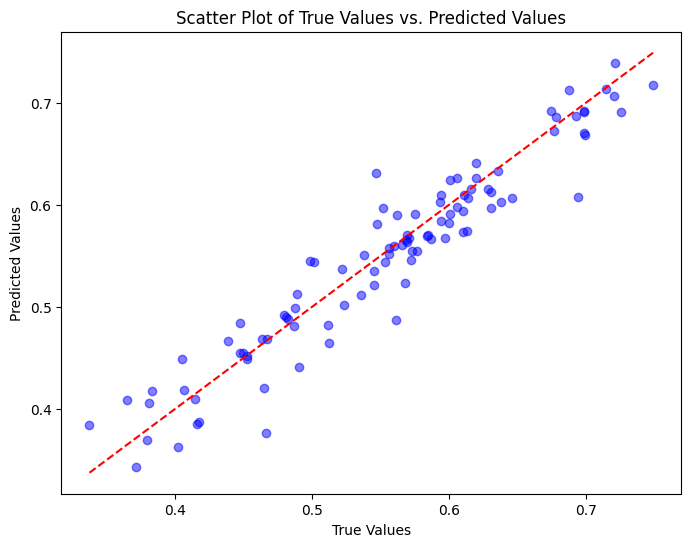

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(best_y_test, best_y_pred, color='blue', alpha=0.5)  # Plotting predicted vs. true values
plt.plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], linestyle='--', color='red')  # Diagonal line for perfect predictions
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True Values vs. Predicted Values')
plt.show()


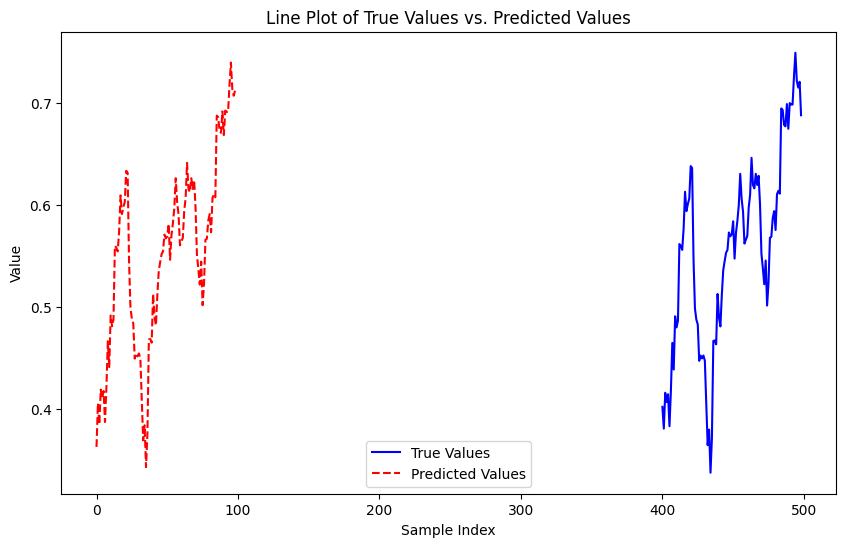

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(best_y_test, label='True Values', color='blue')
plt.plot(best_y_pred, label='Predicted Values', linestyle='--', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Line Plot of True Values vs. Predicted Values')
plt.legend()
plt.show()
